In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [3]:
# column_names = ["QUOTE_UNIXTIME", "QUOTE_READTIME", "QUOTE_DATE", "QUOTE_TIME_HOURS", "UNDERLYING_LAST", "EXPIRE_DATE", "EXPIRE_UNIX", "DTE", "C_DELTA", "C_GAMMA", "C_VEGA", "C_THETA", "C_RHO", "C_IV", "C_VOLUME", "C_LAST", "C_SIZE", "C_BID", "C_ASK", "STRIKE", "P_BID", "P_ASK", "P_SIZE", "P_LAST", "P_DELTA", "P_GAMMA", "P_VEGA", "P_THETA", "P_RHO", "P_IV", "P_VOLUME", "STRIKE_DISTANCE", "STRIKE_DISTANCE_PCT"]

aapl_path_list = ["data/aapl_q1/aapl_eod_202201.txt", "data/aapl_q1/aapl_eod_202202.txt", 
             "data/aapl_q1/aapl_eod_202203.txt", "data/aapl_q2_q3/aapl_eod_202204.txt", 
             "data/aapl_q2_q3/aapl_eod_202205.txt", "data/aapl_q2_q3/aapl_eod_202206.txt", 
             "data/aapl_q2_q3/aapl_eod_202207.txt", "data/aapl_q2_q3/aapl_eod_202208.txt", 
             "data/aapl_q2_q3/aapl_eod_202209.txt", "data/aapl_q4/aapl_eod_202210.txt", 
             "data/aapl_q4/aapl_eod_202211.txt", "data/aapl_q4/aapl_eod_202212.txt"]

aapl_df = pd.DataFrame()
for path in aapl_path_list:
    dat = pd.read_csv(path, sep = ",")
    aapl_df = pd.concat([aapl_df, dat])
# aapl_df
aapl_df = aapl_df.rename(columns={'[QUOTE_UNIXTIME]':"quote_unixtime",
 ' [QUOTE_READTIME]':"quote_readtime",
 ' [QUOTE_DATE]':'quote_date',
 ' [QUOTE_TIME_HOURS]': "quote_time_hours",
 ' [UNDERLYING_LAST]': 'underlying_last',
 ' [EXPIRE_DATE]':'expire_date',
 ' [EXPIRE_UNIX]':'expire_unix',
 ' [DTE]':'dte',
 ' [C_DELTA]':'c_delta',
 ' [C_GAMMA]':'c_gamma',
 ' [C_VEGA]':'c_vega',
 ' [C_THETA]':'c_theta',
 ' [C_RHO]':'c_rho',
 ' [C_IV]': 'c_iv',
 ' [C_VOLUME]':'c_volume',
 ' [C_LAST]':'c_last',
 ' [C_SIZE]':'c_size',
 ' [C_BID]':'c_bid',
 ' [C_ASK]':'c_ask',
 ' [STRIKE]':'strike',
 ' [P_BID]':'p_bid',
 ' [P_ASK]':'p_ask',
 ' [P_SIZE]':'p_size',
 ' [P_LAST]':'p_last',
 ' [P_DELTA]':'p_delta',
 ' [P_GAMMA]':'p_gamma',
 ' [P_VEGA]':'p_vega',
 ' [P_THETA]':'p_theta',
 ' [P_RHO]':'p_rho',
 ' [P_IV]':'p_iv',
 ' [P_VOLUME]':'p_volume',
 ' [STRIKE_DISTANCE]':'strike_distance',
 ' [STRIKE_DISTANCE_PCT]': 'strike_distance_pct'})

aapl_df.quote_date = pd.to_datetime(aapl_df['quote_date'], format="%Y-%m-%d")
aapl_df.expire_date = pd.to_datetime(aapl_df['expire_date'])
aapl_df = aapl_df[aapl_df.expire_date < "2023-01-01"]

C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\1100230783.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\1100230783.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\1100230783.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\1100230783.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\1100230783.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed 

In [4]:
path_list_qqq = ["data/qqq_q1/qqq_eod_202201.txt", "data/qqq_q1/qqq_eod_202202.txt", 
                 "data/qqq_q1/qqq_eod_202203.txt", "data/qqq_q2/qqq_eod_202204.txt", 
                 "data/qqq_q2/qqq_eod_202205.txt", "data/qqq_q2/qqq_eod_202206.txt",
                 "data/qqq_q3/qqq_eod_202207.txt", "data/qqq_q3/qqq_eod_202208.txt",
                 "data/qqq_q3/qqq_eod_202209.txt", "data/qqq_q4/qqq_eod_202210.txt",
                 "data/qqq_q4/qqq_eod_202211.txt", "data/qqq_q4/qqq_eod_202212.txt"]
df_qqq = pd.DataFrame()
for path in path_list_qqq:
    dat = pd.read_csv(path, sep = ",")
    df_qqq = pd.concat([df_qqq, dat])
df_qqq = df_qqq.rename(columns={'[QUOTE_UNIXTIME]':"quote_unixtime",
 ' [QUOTE_READTIME]':"quote_readtime",
 ' [QUOTE_DATE]':'quote_date',
 ' [QUOTE_TIME_HOURS]': "quote_time_hours",
 ' [UNDERLYING_LAST]': 'underlying_last',
 ' [EXPIRE_DATE]':'expire_date',
 ' [EXPIRE_UNIX]':'expire_unix',
 ' [DTE]':'dte',
 ' [C_DELTA]':'c_delta',
 ' [C_GAMMA]':'c_gamma',
 ' [C_VEGA]':'c_vega',
 ' [C_THETA]':'c_theta',
 ' [C_RHO]':'c_rho',
 ' [C_IV]': 'c_iv',
 ' [C_VOLUME]':'c_volume',
 ' [C_LAST]':'c_last',
 ' [C_SIZE]':'c_size',
 ' [C_BID]':'c_bid',
 ' [C_ASK]':'c_ask',
 ' [STRIKE]':'strike',
 ' [P_BID]':'p_bid',
 ' [P_ASK]':'p_ask',
 ' [P_SIZE]':'p_size',
 ' [P_LAST]':'p_last',
 ' [P_DELTA]':'p_delta',
 ' [P_GAMMA]':'p_gamma',
 ' [P_VEGA]':'p_vega',
 ' [P_THETA]':'p_theta',
 ' [P_RHO]':'p_rho',
 ' [P_IV]':'p_iv',
 ' [P_VOLUME]':'p_volume',
 ' [STRIKE_DISTANCE]':'strike_distance',
 ' [STRIKE_DISTANCE_PCT]': 'strike_distance_pct'})
df_qqq.quote_date = pd.to_datetime(df_qqq['quote_date'])
df_qqq.expire_date = pd.to_datetime(df_qqq['expire_date'])
df_qqq = df_qqq[df_qqq.expire_date < "2023-01-01"]

C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\3810501613.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\3810501613.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\3810501613.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\3810501613.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_4316\3810501613.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types

In [5]:
def get_closing(start_date, end_date):
    tickers = ['QQQ', 'AAPL']
    data = yf.download(tickers, start=start_date, end=end_date)
    last_quote = data['Adj Close']
    return last_quote

closing_data = get_closing('2022-01-01', '2022-12-31')
closing_data.head()
closing_data.to_csv('data/closing.csv', index = True)

[*********************100%***********************]  2 of 2 completed


In [18]:
closing_data = pd.read_csv('data/closing.csv')
closing_data

,Date,AAPL,QQQ
0,2022-01-03,180.683868,398.125092
1,2022-01-04,178.390717,392.961182
2,2022-01-05,173.645523,380.889008
3,2022-01-06,170.746811,380.621338
4,2022-01-07,170.915588,376.498199
...,...,...,...
246,2022-12-23,131.658981,266.946716
247,2022-12-27,129.831772,263.172577
248,2022-12-28,125.847855,259.697968
249,2022-12-29,129.412415,266.028168


In [19]:
closing_data['Date'] = pd.to_datetime(closing_data['Date'])
dates = closing_data['Date'].drop_duplicates().tolist()


best_aapl_dte = []
best_aapl_expiration_date = []
best_aapl_strike = []
best_aapl_c_delta = []
best_aapl_p_delta = []
best_aapl_c_volume = []
best_aapl_p_volume = []
best_aapl_c_iv = []
best_aapl_p_iv = []

best_qqq_dte = []
best_qqq_expiration_date = []
best_qqq_strike = []
best_qqq_c_delta = []
best_qqq_p_delta = []
best_qqq_c_volume = []
best_qqq_p_volume = []
best_qqq_c_iv = []
best_qqq_p_iv = []

for d in dates:
    day_text = d.strftime("%Y-%m-%d")
    closing_qqq_date = closing_data[closing_data['Date'] == day_text]["QQQ"]
    # print(closing_qqq_date)
    closing_aapl_date = closing_data[closing_data['Date'] == day_text]["AAPL"]
    # print ("<{}>".format(df_qqq.columns[1]))
    # date_qqq_df = df_qqq[(df_qqq['quote_date'] == day_text) & 
    #                      (df_qqq.dte >= 21) & 
    #                      (df_qqq.dte <= 35)]
    date_df_aapl = aapl_df[(aapl_df['quote_date'] == day_text) & 
                         (aapl_df.dte >= 21) & 
                         (aapl_df.dte <= 35)]
    # print(date_qqq_df)

    best_aapl = None
    best_aapl_dif = 10000
    
    for opt in range(len(date_df_aapl.index)):
        dif = abs(date_df_aapl.strike.iloc[opt] - closing_aapl_date.iloc[0])
        if dif < best_aapl_dif:
            best_aapl_dif = dif
            best_aapl = date_df_aapl.iloc[opt]
    
    if best_aapl is not None:
        best_aapl_dte.append(best_aapl.dte)
        best_aapl_expiration_date.append(best_aapl.expire_date)
        best_aapl_strike.append(best_aapl.strike)
        best_aapl_c_delta.append(best_aapl.c_delta)
        best_aapl_p_delta.append(best_aapl.p_delta)
        best_aapl_c_volume.append(best_aapl.c_volume)
        best_aapl_p_volume.append(best_aapl.p_volume)
        best_aapl_c_iv.append(best_aapl.c_iv)
        best_aapl_p_iv.append(best_aapl.p_iv)
    else:
        best_aapl_dte.append(None)
        best_aapl_expiration_date.append(None)
        best_aapl_strike.append(None)
        best_aapl_c_delta.append(None)
        best_aapl_p_delta.append(None)
        best_aapl_c_volume.append(None)
        best_aapl_p_volume.append(None)
        best_aapl_c_iv.append(None)
        best_aapl_p_iv.append(None)
    
    date_qqq_df = df_qqq[(df_qqq['quote_date'] == day_text) & 
                         (df_qqq.dte == best_aapl_dte[-1])]
    
    best_qqq = None
    best_qqq_dif = 10000
    
    for opt in range(len(date_qqq_df.index)):
        dif = abs(date_qqq_df.strike.iloc[opt] - closing_qqq_date.iloc[0])
        if dif < best_qqq_dif:
            best_qqq_dif = dif
            best_qqq = date_qqq_df.iloc[opt]
    
    if best_aapl is not None:
        best_qqq_dte.append(best_qqq.dte)
        best_qqq_expiration_date.append(best_qqq.expire_date)
        best_qqq_strike.append(best_qqq.strike)
        best_qqq_c_delta.append(best_qqq.c_delta)
        best_qqq_p_delta.append(best_qqq.p_delta)
        best_qqq_c_volume.append(best_qqq.c_volume)
        best_qqq_p_volume.append(best_qqq.p_volume)
        best_qqq_c_iv.append(best_qqq.c_iv)
        best_qqq_p_iv.append(best_qqq.p_iv)
    else:
        best_qqq_dte.append(None)
        best_qqq_expiration_date.append(None)
        best_qqq_strike.append(None)
        best_qqq_c_delta.append(None)
        best_qqq_p_delta.append(None)
        best_qqq_c_volume.append(None)
        best_qqq_p_volume.append(None)
        best_qqq_c_iv.append(None)
        best_qqq_p_iv.append(None)
    
closest_options_aapl = pd.DataFrame({"date": dates,
                                     "strike": best_aapl_strike,
                                     "expiration_date":best_aapl_expiration_date,
                                    "dte":best_aapl_dte,
                                    "c_delta":best_aapl_c_delta,
                                    "p_delta":best_aapl_p_delta,
                                    "c_volume":best_aapl_c_volume,
                                    "p_volume":best_aapl_p_volume,
                                    "c_iv":best_aapl_c_iv,
                                    "p_iv":best_aapl_p_iv
                                    })

closest_options_qqq = pd.DataFrame({"date": dates,
                                     "strike": best_qqq_strike,
                                    "expiration_date":best_qqq_expiration_date,
                                    "dte":best_qqq_dte,
                                    "c_delta":best_qqq_c_delta,
                                    "p_delta":best_qqq_p_delta,
                                    "c_volume":best_qqq_c_volume,
                                    "p_volume":best_qqq_p_volume,
                                    "c_iv":best_qqq_c_iv,
                                    "p_iv":best_qqq_p_iv
                                    })

In [20]:
# closest_options_aapl["iv_2"] = pd.to_numeric(closest_options_aapl["p_iv"]) + pd.to_numeric(closest_options_aapl["c_iv"])
# closest_options_aapl
# closest_options_aapl["iv"] = closest_options_aapl["iv_2"].div(2)

cols_convert = ["strike", "dte", "c_delta", "p_delta", "c_volume", "p_volume", "c_iv", "p_iv"]
closest_options_aapl[cols_convert] = closest_options_aapl[cols_convert].apply(pd.to_numeric, errors='coerce', axis=1)
closest_options_qqq[cols_convert] = closest_options_qqq[cols_convert].apply(pd.to_numeric, errors='coerce', axis=1)

In [26]:
def signal_ratio(df_aapl, df_qqq):
    aapl_iv = (df_aapl.c_iv.astype(float) + df_aapl.p_iv.astype(float)) / 2
    qqq_iv = (df_qqq.c_iv.astype(float) + df_qqq.p_iv.astype(float)) / 2
    df = pd.DataFrame()
    df["date"] = df_qqq["date"]
    df["signal_ratio"] = aapl_iv / qqq_iv
    return df
signal_ratios = signal_ratio(closest_options_aapl, closest_options_qqq)
signal_ratios

,date,signal_ratio
0,2022-01-03,1.608729
1,2022-01-04,1.636576
2,2022-01-05,1.235767
3,2022-01-06,1.370589
4,2022-01-07,1.340493
...,...,...
246,2022-12-23,NaN
247,2022-12-27,NaN
248,2022-12-28,NaN
249,2022-12-29,NaN


In [ ]:
signal_ratios[signal_ratio['signal_ratio'].head(20)

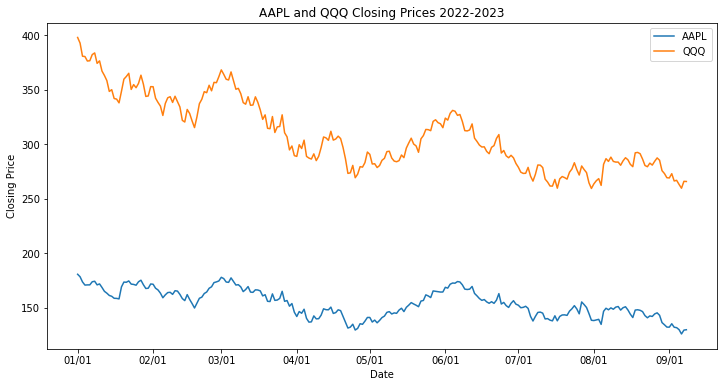

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(closing_data['AAPL'], label='AAPL')
ax.plot(closing_data['QQQ'], label='QQQ')
# Configure x-axis ticks to show the first of every month
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('AAPL and QQQ Closing Prices 2022-2023')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Signal Ratio 2022-2023')

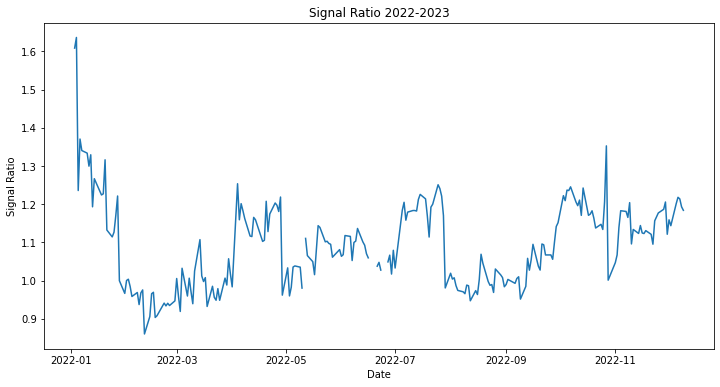

In [23]:
plt.figure(figsize=(12, 6))
signal_ratio_plot = signal_ratios
signal_ratio_plot.set_index('date', inplace=True)
plt.plot(signal_ratios['signal_ratio'])
plt.xlabel('Date')
plt.ylabel('Signal Ratio')
plt.title('Signal Ratio 2022-2023')

In [177]:
# load daily stock closing prices
stock_data = pd.read_csv("data/closing.csv")

# isLong is true if we are long the straddle, false if we are short the straddle
# aaplOrQQQ is True if we are trading apple, False if we are trading QQQ 

def runDeltaHedge(optStrike, optExp, entryDate, isLong, aaplOrQQQ):
    # initialize the portfolio
    portfolio = {
        "stock_pos": 0,
        "options_strike": optStrike,
        "option_exp": optExp,
        "cash_pos": 0,
        "delta": 0
    }
    #Initial option data
    tickerStr = 'AAPL'
    if(not aaplOrQQQ ):
        tickerStr = 'QQQ'
    entryOption = date_aapl_df[date_aapl_df['expire_date'] == portfolio['optExp'] & date_aapl_df['strike'] == portfolio['optStrike'] & date_aapl_df['quote_date'] == entryDate]
    if(not aaplOrQQQ):
        entryOption = date_qqq_df[date_qqq_df['expire_date'] == portfolio['optExp'] & date_qqq_df['strike'] == portfolio['optStrike'] & date_qqq_df['quote_date'] == entryDate]
    entryPutAsk = entryOption['p_ask']
    entryCallAsk = entryOption['c_ask']
    entryPutBid = entryOption['p_bid']
    entryCallBid = entryOption['c_bid']

    

    # We buy or sell the straddle
    if(isLong == True):
        portfolio["cash_pos"] -= 100 * (entryPutAsk + entryCallAsk)
    if(isLong == False):
        portfolio["cash_pos"] += 100 * (entryPutBid + entryCallBid)
    
    #Loop through each day until 2 days before expiry
    for day in range(enter_day, expiryDay - 1):
        #Get option data for that day
        option = date_aapl_df[date_aapl_df['expire_date'] == portfolio['optExp'] & date_aapl_df['strike'] == portfolio['optStrike'] & date_aapl_df['quote_date'] == day]
        if(not aaplOrQQQ):
            option = date_qqq_df[date_qqq_df['expire_date'] == portfolio['optExp'] & date_qqq_df['strike'] == portfolio['optStrike'] & date_qqq_df['quote_date'] == day]
        cDelta = option['c_delta']
        pDelta = option['p_delta']
        #Recalculate delta
        if(isLong):
            portfolio['delta'] += 100 * (cDelta + pDelta)
        if(not isLong):
            portfolio['delta'] -= 100 * (cDelta + pDelta)
        #Hedge delta by buying or shorting the underlying
        if(portfolio['delta'] > 1):
            tradeAmt = int(portfolio[delta])
            portfolio['stock_pos'] -= tradeAmt
            portfolio['cash_pos'] += tradeAmt * stock_data[stock_data['Date'] == day][tickerStr]
        if(portfolio['delta'] < -1):
            tradeAmt = int(-portfolio[delta])
            portfolio['stock_pos'] += tradeAmt
            portfolio['cash_pos'] -= tradeAmt * stock_data[stock_data['Date'] == day][tickerStr]

    #Close Position 

    #Price of underlying at close
    closeUnderPrice = stock_data[stock_data['Date'] == expiryDay - 1][tickerStr]

    #Close Stock Position

    portfolio['cash_pos'] += portfolio['stock_pos'] * closeUnderPrice

    #Close Option Position
    
    closeOption = date_aapl_df[date_aapl_df['expire_date'] == portfolio['optExp'] & date_aapl_df['strike'] == portfolio['optStrike'] & date_aapl_df['quote_date'] == expiryDay - 1]
    if(not aaplOrQQQ):
        closeOption = date_qqq_df[date_qqq_df['expire_date'] == portfolio['optExp'] & date_qqq_df['strike'] == portfolio['optStrike'] & date_qqq_df['quote_date'] == expiryDay - 1]
    #Option data at close
    closePutBid = closeOption['p_bid']
    closeCallBid = closeOption['c_bid']
    closePutAsk = closeOption['p_ask']
    closeCallAsk = closeOption['c_ask']
    #If we are long, we can exit through Bid or intrinsic
    if(isLong):
        if(closeUnderPrice < portfolio['options_strike']):
            exProfit = 100 * (portfolio['options_strike'] - closeUnderPrice)
            portfolio['cash_pos'] += 100 * max(exProfit, closePutBid)
            portfolio['cash_pos'] += 100 * closeCallBid
        if(closeUnderPrice > portfolio['options_strike']):
            exProfit = 100 * (closeUnderPrice - portfolio['options_strike'])
            portfolio['cash_pos'] +=  100 * max(exProfit, closeCallBid)
            portfolio['cash_pos'] += 100 * closePutBid
    #If we are short, we can exit through Ask
    if(not isLong):
        portfolio['cash_pos'] -= 100 * closeCallAsk
        portfolio['cash_pos'] -= 100 * closePutAsk

    return portfolio['cash_pos']

In [184]:
def find_best_signal(signal_data):
    cash_long_list = []
    cash_short_list = []
    # entrance
    for i in range(len(closest_options_aapl.index)):
        print(i)
        opt_strike = closest_options_aapl.strike.iloc[i]
        opt_exp = closest_options_aapl.expiration_date.iloc[i]
        opt_entry = closest_options_aapl.date.iloc[i]
        
        cash_long = runDeltaHedge(opt_strike, opt_exp, opt_entry, True, True) # long the straddle
        cash_short = runDeltaHedge(opt_strike, opt_exp, opt_entry, False, True) # short the straddle
        
        cash_long_list.append(cash_long)
        cash_short_list.append(cash_short)
        
    pos_df = pd.DataFrame({'date':dates, 'signal_ratio': signal_ratios, 'cash_long': cash_long_list, 'cash_short': cash_short_list})
    return(pos_df)

pos_df = find_best_signal(signal_ratios)

# pos_df = pd.DataFrame({'signal_ratio': [.3,.7,.1], 'cash_long': [3,7,1], 'cash_short': [6,3,10]})

pos_df_top_long = pos_df[pos_df.cash_long > 0].sort_values(by = ['cash_long'], ascending=False)
pos_df_top_short = pos_df[pos_df.cash_short > 0].sort_values(by = ['cash_short'], ascending=False)

pos_df_top_long["weight"] = pos_df_top_long['cash_long'] / pos_df_top_long['cash_long'].sum()
pos_df_top_short["weight"] = pos_df_top_short['cash_short'] /  pos_df_top_long['cash_short'].sum()

signal_long = (pos_df_top_long["weight"] * pos_df_top_long["signal_ratio"]).sum()
signal_short = (pos_df_top_short["weight"] * pos_df_top_short["signal_ratio"]).sum()
